# Breast Cancer Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from graphviz import Source
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from tabulate import tabulate

## Modelo de Classificação

### Carregamento do dataset Breast Cancer e dividindo 70%/30% para treino e teste

In [2]:
# Load dataset
cancer = load_breast_cancer()

# Selecionando features para visualização
X_cancer = cancer.data
y_cancer = cancer.target

# Divide em treino (70%) e teste (30%) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, 
    y_cancer, 
    test_size=0.3,  # 30% para teste
    random_state=42,
    stratify=y_cancer
)

### Treinamento de árvore de decisão para classificação

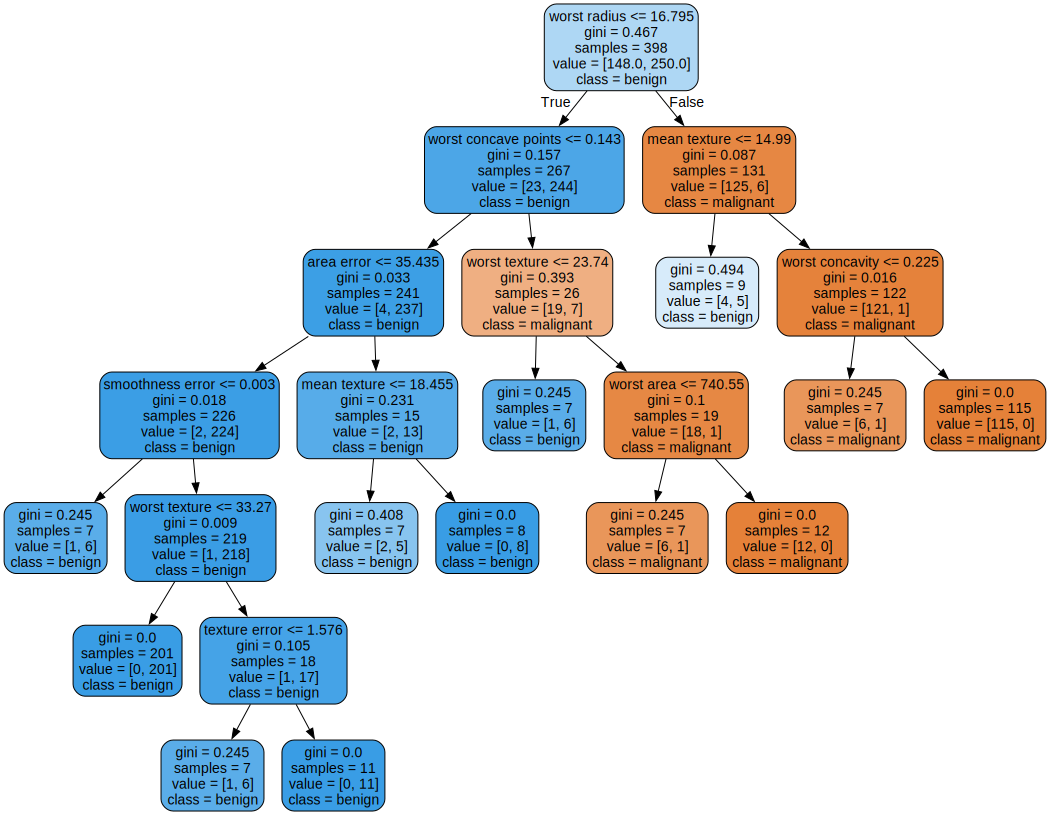

In [ ]:
# Criar e treinar o modelo
tree_clf = DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=10 ,random_state=42)
tree_clf.fit(X_train, y_train)

# Exportar a árvore para visualização
export_graphviz(
    tree_clf,
    out_file="cancer_tree.dot",
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    rounded=True,
    filled=True
)

# Mostrar a árvore
Source.from_file("cancer_tree.dot")

### Predições

In [4]:
y_pred = tree_clf.predict(X_test)

### Avaliação dos testes

In [5]:
print("\nMétricas de Avaliação:")
print("----------------------")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


Métricas de Avaliação:
----------------------
Acurácia: 0.9357
Precisão: 0.9444
Recall: 0.9533
F1-Score: 0.9488


### Relatório completo

In [6]:
print("\nRelatório de Classificação:")
print("--------------------------")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# 6. DataFrame com métricas para visualização
metrics_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-Score'],
    'Valor': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
print("\nTabela Resumo:")
print(metrics_df)


Relatório de Classificação:
--------------------------
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Tabela Resumo:
    Métrica     Valor
0  Acurácia  0.935673
1  Precisão  0.944444
2    Recall  0.953271
3  F1-Score  0.948837


### Importância dos parâmetros

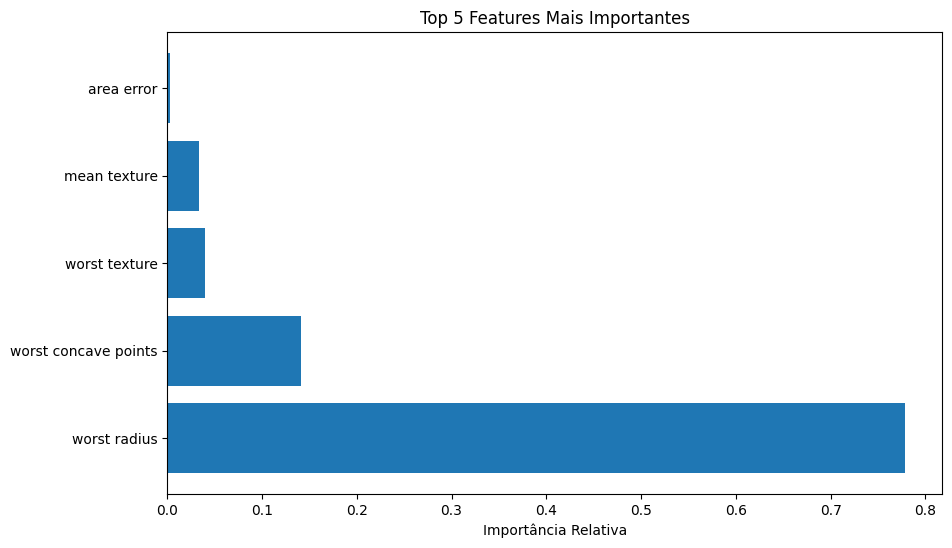

In [7]:
# Obter importância das features
importances = tree_clf.feature_importances_
feature_names = cancer.feature_names

# Criar DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:5], importance_df['Importance'][:5])
plt.title('Top 5 Features Mais Importantes')
plt.xlabel('Importância Relativa')
plt.show()

In [8]:
df = pd.DataFrame(X_train, columns=feature_names)
df['target'] = y_train

correlation = df.corr()['target'].abs().sort_values(ascending=False)[1:]
print(correlation.head(10))

worst concave points    0.805620
worst perimeter         0.786786
mean concave points     0.784803
worst radius            0.780534
mean perimeter          0.753309
worst area              0.742426
mean radius             0.740440
mean area               0.729514
mean concavity          0.692792
worst concavity         0.677122
Name: target, dtype: float64
